# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.117246e+01     7.161782e+00
 * time: 0.004531145095825195
     1     2.756985e+01     4.524476e+00
 * time: 0.01299905776977539
     2     2.179469e+01     5.526614e+00
 * time: 0.03538799285888672
     3     1.369484e+01     2.445572e+00
 * time: 0.05988311767578125
     4     1.137401e+01     8.990128e-01
 * time: 0.08003020286560059
     5     1.120480e+01     1.364705e+00
 * time: 0.096343994140625
     6     1.071029e+01     1.156589e+00
 * time: 0.11233115196228027
     7     1.030796e+01     9.087989e-01
 * time: 0.12849116325378418
     8     1.002893e+01     6.654500e-01
 * time: 0.14469504356384277
     9     9.897483e+00     5.726873e-01
 * time: 0.160858154296875
    10     9.809244e+00     4.840602e-01
 * time: 0.1771700382232666
    11     9.724593e+00     5.454685e-01
 * time: 0.19354009628295898
    12     9.656872e+00     3.774039e-01
 * time: 0.2097780704498291
    13     9.647900e+00     6.276209e-01
 * time: 0.22

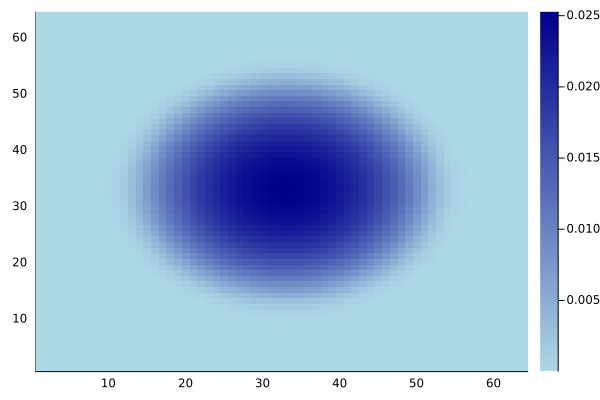

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)